# Processing a scene

An agent comes equipped with a battery of sensors, such as a camera depth estimation sensors, compass, and odometer. Here, we focus on the the processing of retino-topic information provided by a camera and a depth estimation sensor. This retino-topic information is refer as a scene.

**Image based scene (IBS)**
:    A classical image. Each pixel is viewed in a direction (elevation,azimuth) in a regular manner. In that case the scene is a 4d numpy array [elevation-index,azimuth-index,channel-index,1].

**Omatidium based scene (OBS)**
:    In an ommatidia based scene, the viewing direction do not need to be regularally spaced. In that case the scene is a 3d numpy array [ommatidia-index, channel-index,1].

## Place code
Processing a scene yield to a certain encoding of information at the location where the scene was acquired, rendered, seen by the agent.

By extension a place-code is either image based or ommatidium based. The number of dimension of an ib-place-code is always 4, and of an ob-place-code always 3.

**Image based place-code (IBPC)**
:    A place code derived from IBS. Each pixel is viewed in a direction (elevation,azimuth) in a regular manner. In that case the scene is a 4d numpy array [elevation-index,azimuth-index,channel-index,component-index].

**Omatidium based place-code (OBPC)**
:    A place code derived from OBS, the viewing direction do not need to be regularally spaced. In that case the scene is a 3d numpy array [ommatidia-index, channel-index,component-index].

Abusing the terminology of a place-code, a scene can be a place-code. Therefore ibs and obs have 4 and 3 dimension, respectively.


In [1]:
from navipy.processing import pcode

/home/bolirev/.virtualenvs/toolbox-navigation/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bolirev/.virtualenvs/toolbox-navigation/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Load the necessary modules
from navipy.database import DataBase
from matplotlib.image import imsave
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the database, and specify the
# the output directory to save the list
# of images
import pkg_resources
# Use the trafile from the resources
# You can adapt this code, by changing trajfile 
# with your own trajectory file
database = pkg_resources.resource_filename(
    'navipy',
    'resources/database.db')
database_dir, _ = os.path.splitext(database)
if not os.path.exists(database_dir):
    os.makedirs(database_dir)
database_template = os.path.join(database_dir, 'frame_{}.png')
mydb = DataBase(database)
my_scene = mydb.scene(posorient=mydb.posorients.iloc[0])

### Skyline

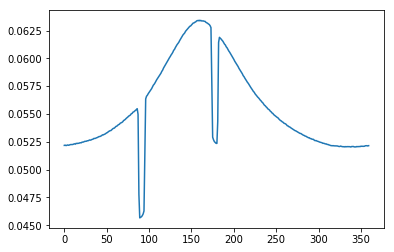

In [3]:
my_skyline = pcode.skyline(my_scene)
plt.plot(my_skyline[0,:,1,0]) # ploting the channel 1, for all azimuth

### Michelson contrast

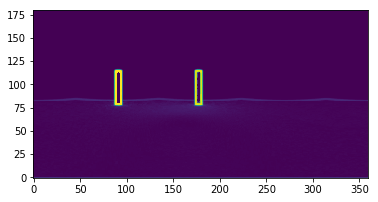

In [4]:
my_contrast = pcode.michelson_contrast(my_scene)
plt.imshow(my_contrast[...,1,0]) # Green-contrast
plt.gca().invert_yaxis()

### Contrast weighted nearness

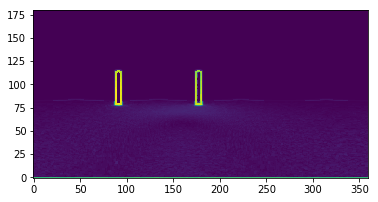

In [5]:
my_contrast = pcode.contrast_weighted_nearness(my_scene)
plt.imshow(my_contrast[...,1,0]) # Green-contrast weighted nearness
plt.gca().invert_yaxis()

### Place code vector

Text(0.5,0,'z')

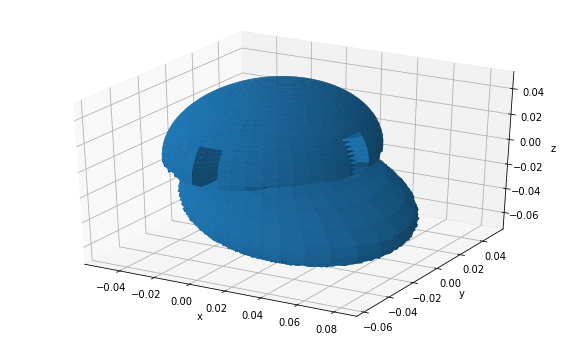

In [6]:
view_dir = mydb.viewing_directions
view_dir = np.round(mydb.viewing_directions,4) #due to rounding error in database
view_dir = np.deg2rad(view_dir) # Database uses degrees, but navipy functions require radians
my_pcv = pcode.pcv(my_scene,view_dir)

from mpl_toolkits.mplot3d import Axes3D
from navipy.scene import __cartesian_indeces__

channel = 1 # Green channel
x = my_pcv[...,channel,__cartesian_indeces__['x']]
y = my_pcv[...,channel,__cartesian_indeces__['y']]
z = my_pcv[...,channel,__cartesian_indeces__['z']]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### Average place code vector

In [7]:
view_dir = mydb.viewing_directions
view_dir = np.round(mydb.viewing_directions,4) #due to rounding error in database
view_dir = np.deg2rad(view_dir) # Database uses degrees, but navipy functions require radians
my_apcv = pcode.apcv(my_scene,view_dir)

from mpl_toolkits.mplot3d import Axes3D
from navipy.scene import __cartesian_indeces__

scale = 2000 # To be able to see pcv and apcv
channel = 1 # Green channel
x = my_pcv[...,channel,__cartesian_indeces__['x']]
y = my_pcv[...,channel,__cartesian_indeces__['y']]
z = my_pcv[...,channel,__cartesian_indeces__['z']]
apcv_x = my_apcv[...,channel,__cartesian_indeces__['x']]/scale
apcv_y = my_apcv[...,channel,__cartesian_indeces__['y']]/scale
apcv_z = my_apcv[...,channel,__cartesian_indeces__['z']]/scale

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
ax.plot([0,apcv_x], [0,apcv_y], [0,apcv_z])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5,0,'z')